In [40]:
!pip install langgraph langchain langchain-community langchain-groq

In [41]:
from langgraph.graph import StateGraph, START, END
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages
import os
from langchain_groq import ChatGroq
from google.colab import userdata

## Initialize

In [42]:
os.environ["GROQ_API_KEY"] = userdata.get("GROQ_API_KEY")
llm=ChatGroq(model="deepseek-r1-distill-llama-70b")

In [43]:
class State(TypedDict):
  messages: Annotated[list, add_messages]

def groq_chat(state: State):
  return {"messages":[llm.invoke(state["messages"])]}

In [44]:
graph_builder = StateGraph(State)
graph_builder.add_node("groq_bot", groq_chat)
graph_builder.add_edge(START, "groq_bot")
graph_builder.add_edge("groq_bot", END)
graph = graph_builder.compile()

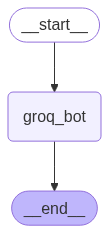

In [45]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [46]:
while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "exit", "q"]:
      print("Goodbye")
      break

    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
      for value in event.values():
        print("Assistant:", value["messages"][-1].content)

User: Hi
Assistant: <think>

</think>

Hello! How can I assist you today? 😊
User: What is ITC?
Assistant: <think>

</think>

ITC can stand for different things depending on the context. Here are a few common meanings:

1. **International Trade Centre**: The International Trade Centre (ITC) is a joint agency of the World Trade Organization (WTO) and the United Nations (UN). Its main goal is to promote economic growth in developing countries by helping them to integrate into the global trade system. The ITC focuses on improving export competitiveness, strengthening the private sector, and fostering trade-related technical assistance.

2. **Imperial Tobacco Company**: ITC (Imperial Tobacco Company) is a British multinational tobacco company. It is one of the largest tobacco companies in the world, with a diverse portfolio of brands and products.

3. **Information Technology and Computing**: In some contexts, ITC can refer to Information Technology and Computing, which involves the use of 